## Pyber Summary
* There seems to be a slight increase from average fare from urban to suburban, as well as suburban to rural. Although it seems to be a slight increase, it doesn't seem definitive enough, but there could be a cause due to a smaller amount of drivers in rural vs. a slightly larger percentage of total rides in rural cities.
* There seems to be a few outliers in terms of Rural average fare, but that could be traced back to a lot more rural rides than drivers, as driving from urban to rural could cause certain outliers especially with a smaller sample size in rural communities vs. the larger circles and sample sizes of larger cities.
* Larger driver counts in certain cities tend to have a cheaper average fair per ride, due to possible congestion/large amount of drivers proportional to people needing rides.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

city_file = os.path.join("Instructions","Pyber","raw_data","city_data.csv")
ride_file = os.path.join("Instructions","Pyber","raw_data","ride_data.csv")

city_pd = pd.read_csv(city_file)
ride_pd = pd.read_csv(ride_file)

new_city = city_pd.drop_duplicates('city')

city_ride_pd = pd.merge(new_city, ride_pd, how='left', on='city')
city_ride_pd.head()

grouped_crpd = city_ride_pd.groupby('city')
type_indexed = city_ride_pd.groupby('type')

colors = ["light gold", 'light sky blue', 'coral']
palette = sns.xkcd_palette(colors)

## Bubble Plot of Ride Sharing Data

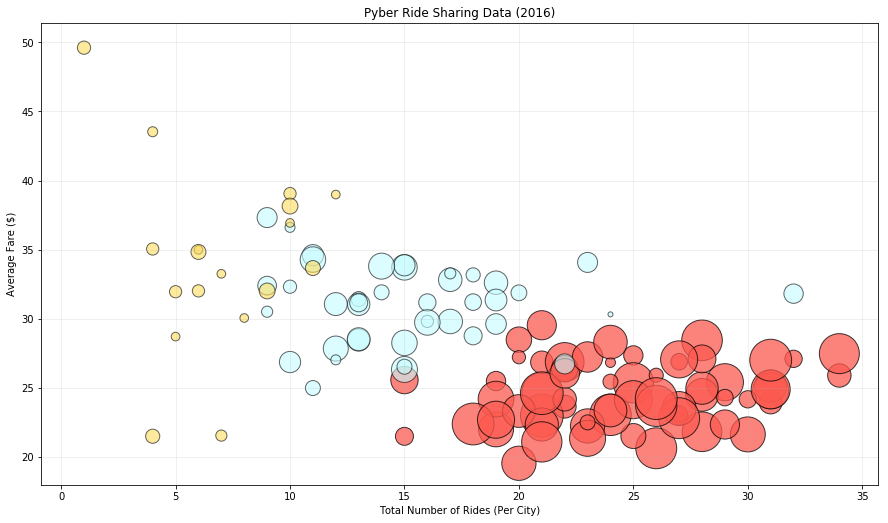

In [14]:
new_city_pd = pd.DataFrame({
    'Ride Count' : grouped_crpd['ride_id'].count(),
    'Driver Count' : grouped_crpd.mean()['driver_count'],
    'Average Fare': grouped_crpd['fare'].mean(),
    'City Type': new_city.set_index('city')['type']
})

urban_pd = new_city_pd.loc[new_city_pd['City Type'] == "Urban"]
suburban_pd = new_city_pd.loc[new_city_pd['City Type'] == "Suburban"]
rural_pd = new_city_pd.loc[new_city_pd['City Type'] == "Rural"]

plt.figure(figsize=(15,8.5))
plt.scatter(urban_pd['Ride Count'], urban_pd['Average Fare'], s = urban_pd['Driver Count']*25, \
            marker = "o", facecolors = palette[2], edgecolors="black", alpha = 0.75)
plt.scatter(suburban_pd['Ride Count'], suburban_pd['Average Fare'], s = suburban_pd['Driver Count']*25, \
            marker = "o", facecolors = palette[1], edgecolors="black", alpha = 0.6)
plt.scatter(rural_pd['Ride Count'], rural_pd['Average Fare'], s = rural_pd['Driver Count']*25, \
            marker = 'o', facecolors = palette[0], edgecolors="black", alpha = 0.6)

plt.grid(alpha = 0.25)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.show()


## Total % Fares by City Type

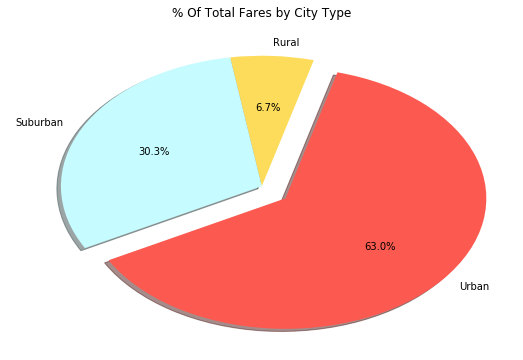

In [3]:
fare_summed = type_indexed.sum()
fare_only = fare_summed[['fare']] 

fare_labels = fare_only.index
fare_explode = (0, 0, 0.15)

plt.figure(figsize=(9,6))
plt.title("% Of Total Fares by City Type")
plt.pie(fare_only, labels = fare_labels, colors = palette, explode = fare_explode, \
        shadow = True, startangle = 75, autopct="%1.1f%%")
plt.show()

## Total % Rides by City Type

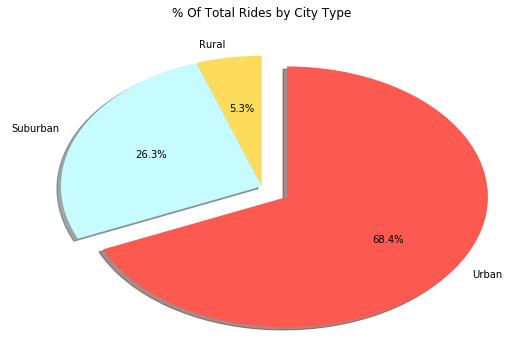

In [15]:
fare_counted = type_indexed.count()
ride_id_count = fare_counted['ride_id']

fare_labels = fare_only.index
fare_explode = (0, 0, 0.15)

plt.figure(figsize=(9,6))
plt.title("% Of Total Rides by City Type")
plt.pie(ride_id_count, labels = fare_labels, colors = palette, explode = fare_explode, \
        shadow = True, startangle = 90, autopct="%1.1f%%")
plt.show()

## Total % Drivers by City Type

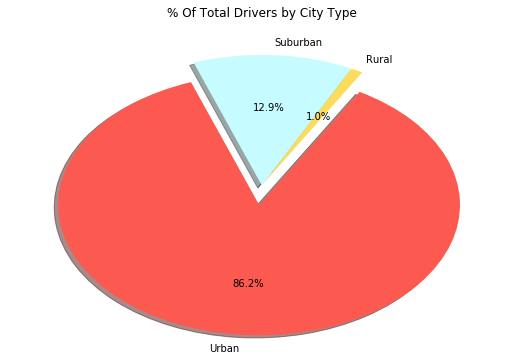

In [5]:
driver_only = fare_summed[['driver_count']] 

fare_labels = driver_only.index
fare_explode = (0, 0, 0.15)

plt.figure(figsize=(9,6))
plt.title("% Of Total Drivers by City Type")
plt.pie(driver_only, labels = fare_labels, colors = palette, explode = fare_explode, \
        shadow = True, startangle = 60, autopct="%1.1f%%")
plt.show()